# **Laduma Analytics Football League Winners Prediction Challenge**


In [2]:
pip install -U layer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Loading all 5 CSV files to Google Colab after importing the Layer library**

In [3]:
import layer

In [4]:
sample_submission = layer.get_dataset("layer/Zindi-Laduma-Analytics/datasets/sample-submission").to_pandas()
sample_submission.head()

Output()

,Game_ID,Away win,Draw,Home Win
0,ID_8518U587,0,0,0
1,ID_H49BIKG7,0,0,0
2,ID_PO6SP4VA,0,0,0
3,ID_MZRCNBAQ,0,0,0
4,ID_CV9VOLIU,0,0,0


In [11]:
train = layer.get_dataset("layer/Zindi-Laduma-Analytics/datasets/train").to_pandas()
train.head()

Output()

,Date,Season,Match_ID,Game_ID,Home Team,Away Team,Score
0,2017-02-15,1,1.0,ID_KAG4KAE9,Antennae,Andromeda,Away win
1,2016-09-14,1,12.0,ID_T7H1XN5Z,Andromeda,Antennae,Draw
2,2016-12-12,1,13.0,ID_O1P9FGN4,Andromeda,Butterfly,Away win
3,2017-01-25,1,14.0,ID_TR5M4KQV,Andromeda,Cigar,Away win
4,2016-08-24,1,15.0,ID_EOIECRE2,Andromeda,Circinus,Home Win


In [5]:
train_game_statistics = layer.get_dataset("layer/Zindi-Laduma-Analytics/datasets/train_game_statistics").to_pandas()
train_game_statistics.head()

Output()

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Season,Manager,...,Start_minutes,End_minutes,next_player,next_action,next_x,next_y,event_id,next_team,next_event_id,xt_value
0,ID_ZZKYYPVY,Player_O7HO1NOB,1.0,52.5,34.0,Circinus,Accurate passes,1st half,2,Ryoichi,...,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_ZZKYYPVY,Player_O7HO1NOB,2.0,52.5,34.0,Circinus,Positional attacks,1st half,2,Ryoichi,...,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID_ZZKYYPVY,Player_J0V7B0YE,3.0,37.0,32.7,Circinus,Positional attacks,1st half,2,Ryoichi,...,0.05,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ID_ZZKYYPVY,Player_J0V7B0YE,4.0,39.5,33.0,Circinus,Positional attacks,1st half,2,Ryoichi,...,0.07,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ID_ZZKYYPVY,Player_J0V7B0YE,5.0,39.5,33.0,Circinus,Inaccurate passes,1st half,2,Ryoichi,...,0.07,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
test = layer.get_dataset("layer/Zindi-Laduma-Analytics/datasets/test").to_pandas()
test.head()

Output()

,Date,Season,Match_ID,Game_ID,Home Team,Away Team
0,2018-12-08,3,102.0,ID_8518U587,Antennae,Cosmos Redshift 7
1,2018-09-11,3,18.0,ID_H49BIKG7,Cosmos Redshift 7,Tadpole
2,2018-09-25,3,32.0,ID_PO6SP4VA,Cosmos Redshift 7,Medusa Merger
3,2018-10-02,3,40.0,ID_MZRCNBAQ,Cartwheel,Cosmos Redshift 7
4,2018-12-20,3,123.0,ID_CV9VOLIU,Cosmos Redshift 7,Needle


In [7]:
test_game_statistics = layer.get_dataset("layer/Zindi-Laduma-Analytics/datasets/test_game_statistics").to_pandas()
test_game_statistics.head()

Output()

,Game_ID,Player_ID,id,X,Y,Team,Half,Season,Manager,Opposition_Team,...,Passes,Start_minutes,End_minutes,next_player,next_x,next_y,event_id,next_team,next_event_id,xt_value
0,ID_ZUPS2JD2,Player_5CBBVY85,1.0,52.5,34.0,Milky Way,1st half,3,Masashi,Sunflower,...,1.0,0.68,1.02,Player_INTSA2WQ,37.5,30.9,0.0,Milky Way,1.0,-0.002220
1,ID_ZUPS2JD2,Player_5CBBVY85,2.0,52.5,34.0,Milky Way,1st half,3,Masashi,Sunflower,...,0.0,0.68,1.02,Player_5CBBVY85,52.5,34.0,0.0,Milky Way,0.0,0.000000
2,ID_ZUPS2JD2,Player_INTSA2WQ,3.0,37.5,30.9,Milky Way,1st half,3,Masashi,Sunflower,...,0.0,0.70,1.03,Player_INTSA2WQ,37.5,30.9,1.0,Milky Way,1.0,0.000000
3,ID_ZUPS2JD2,Player_INTSA2WQ,4.0,37.5,30.9,Milky Way,1st half,3,Masashi,Sunflower,...,1.0,0.70,1.03,Player_1AJ0QRLU,79.0,57.2,1.0,Sunflower,2.0,0.016906
4,ID_ZUPS2JD2,Player_1AJ0QRLU,5.0,26.0,10.8,Sunflower,1st half,3,Frodo,Milky Way,...,0.0,0.77,1.10,Player_75QJWOU4,79.0,57.2,2.0,Milky Way,3.0,0.000000


In [10]:
print(sample_submission.shape)
print(train_game_statistics.shape)
print(train.shape)
print(test_game_statistics.shape)
print(test.shape)

(234, 4)
(1571577, 28)


NameError: ignored

In [ ]:
len((test_game_statistics['Game_ID'].unique()))#412 unique game_id 
#count matches with the train data

234

In [12]:
import pandas as pd
import numpy as np
import feather
import missingno
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)

In [13]:
merge_train = pd.merge(train, train_game_statistics, on='Game_ID', how='left')
merge_test = pd.merge(test, test_game_statistics, on='Game_ID', how='left')
print(merge_train.shape)
print(merge_test.shape)

(1571577, 34)
(780234, 29)


In [14]:
merge_train.to_feather('merged_train_feather.feather')
merge_test.to_feather('merged_test_feather.feather')

In [15]:
ltrain = pd.read_feather('./merged_train_feather.feather')
ltest = pd.read_feather('./merged_test_feather.feather')
print(ltrain.shape)#1571577
print(ltest.shape)

(1571577, 34)
(780234, 29)


In [ ]:
ltest_bk = ltest.copy()
ltrain_bk = ltrain.copy()

# FEature Engineering and EDA¶

**Check Duplicates**

In [16]:
print('Train: ', ltrain.duplicated().any())#there are duplicates
print('Test: ',ltest.duplicated().any())#no duplicates

Train:  True
Test:  False


In [17]:
ltrain = ltrain.drop_duplicates()#drop duplicates by keeing unique values
print(ltrain.shape)

(1567834, 34)


There are only duplicate rows in training data. Not in test data. Dropping all duplicates rows.

# check for imbalance

In [ ]:
ltrain_bk['Score'].value_counts()#629820+505769+435988 =1571577

Home Win    629820
Draw        505769
Away win    435988
Name: Score, dtype: int64

Seems not much of imbalance there is diffrenece of 1 lakh in each class. Lets come back later to this.

# Missing values Check

In [18]:
def missing_value_cnt_percent(dataframe):
    """Function that gives the count and the percent of misisng values"""
    # Checking out the missing values for the dataset so that we can remove it and work further with the dataset. This is a mere part of Data Cleaning.
    total = dataframe.isnull().sum().sort_values(ascending=False)
    percent = (dataframe.isnull().sum()/dataframe.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    #missing_data
    missing_data['Colum_names'] = missing_data.index#columns added
    return missing_data

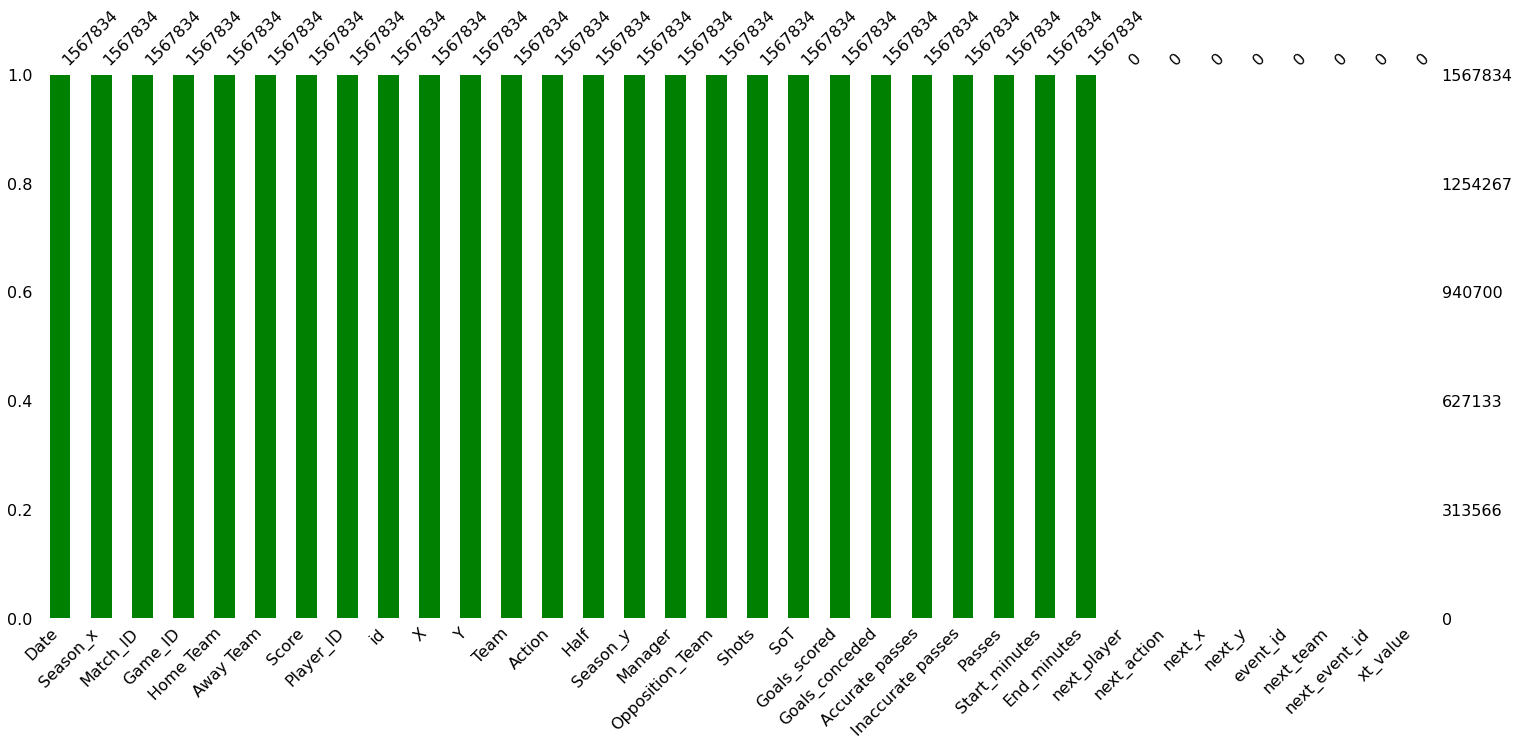

In [ ]:
missingno.bar(ltrain, color='green')#Graph that shows the missing values

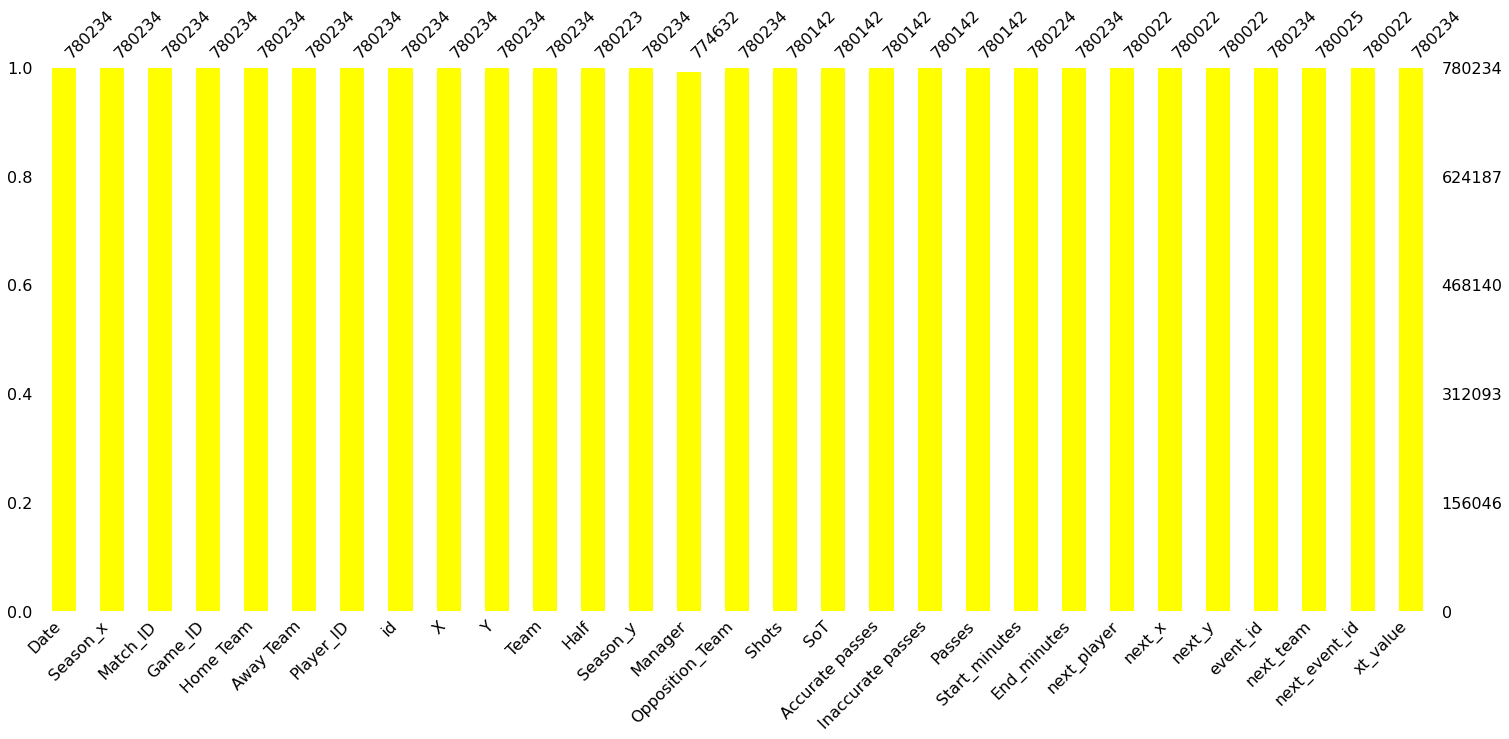

In [ ]:
missingno.bar(ltest, color='yellow')#Graph that shows the missing values

In [19]:
ltrain.isnull().sum()[ltrain.isnull().sum()>1]

next_player      1567834
next_action      1567834
next_x           1567834
next_y           1567834
event_id         1567834
next_team        1567834
next_event_id    1567834
xt_value         1567834
dtype: int64

In [20]:
ltest.isnull().sum()[ltest.isnull().sum()>1]

Half                   11
Manager              5602
Shots                  92
SoT                    92
Accurate passes        92
Inaccurate passes      92
Passes                 92
Start_minutes          10
next_player           212
next_x                212
next_y                212
next_team             209
next_event_id         212
dtype: int64

The missing columns and values are different in both the train and test sample data. Lets explore each oneof the features individually.

In [ ]:
missing_cols=[cols for cols in ltrain.columns if ltrain[cols].isnull().sum()>1]
for i in missing_cols:
    print(i, np.round(ltrain[i].isnull().mean(), 5),  ' % missing values')

next_player 1.0  % missing values
next_action 1.0  % missing values
next_x 1.0  % missing values
next_y 1.0  % missing values
event_id 1.0  % missing values
next_team 1.0  % missing values
next_event_id 1.0  % missing values
xt_value 1.0  % missing values


In [ ]:
missing_cols=[cols for cols in ltest.columns if ltest[cols].isnull().sum()>1]
for i in missing_cols:
    print(i, np.round(ltest[i].isnull().mean(), 5),  ' % missing values')

Half 1e-05  % missing values
Manager 0.00718  % missing values
Shots 0.00012  % missing values
SoT 0.00012  % missing values
Accurate passes 0.00012  % missing values
Inaccurate passes 0.00012  % missing values
Passes 0.00012  % missing values
Start_minutes 1e-05  % missing values
next_player 0.00027  % missing values
next_x 0.00027  % missing values
next_y 0.00027  % missing values
next_team 0.00027  % missing values
next_event_id 0.00027  % missing values


In [ ]:
missing_data =missing_value_cnt_percent(ltrain)
missing_data[missing_data['Percent']>0.8]

,Total,Percent,Colum_names
xt_value,1567834,1.0,xt_value
next_y,1567834,1.0,next_y
next_action,1567834,1.0,next_action
next_x,1567834,1.0,next_x
next_player,1567834,1.0,next_player
event_id,1567834,1.0,event_id
next_team,1567834,1.0,next_team
next_event_id,1567834,1.0,next_event_id


In [ ]:
missing_data =missing_value_cnt_percent(ltest)
missing_data[missing_data['Percent']>0]

,Total,Percent,Colum_names
Manager,5602,0.007180,Manager
next_event_id,212,0.000272,next_event_id
next_y,212,0.000272,next_y
next_x,212,0.000272,next_x
next_player,212,0.000272,next_player
next_team,209,0.000268,next_team
SoT,92,0.000118,SoT
Passes,92,0.000118,Passes
Inaccurate passes,92,0.000118,Inaccurate passes
Accurate passes,92,0.000118,Accurate passes


From the above train and test dataset. I see train dataset has got >80% of the missing columns. and test sample data as got a very less missing values.

# Handle Train Misisng values

**Dropping all >80% missing values in Train dataset**

Lets Drop columns with >50% missing values. Also lets see tehe columns with only 1 unique value.

In [21]:
#All these NaN values are unique values in the train columns
features_drop = []
for i in ltrain.columns:
  if ltrain[i].dtype!='O':
    if len(ltrain[i].unique())==1:
        features_drop.append(i)
        #print(i, data[i].unique())# all are NAN so drop this
print(features_drop)

['next_player', 'next_action', 'next_x', 'next_y', 'event_id', 'next_team', 'next_event_id', 'xt_value']


In [22]:
ltrain.drop(features_drop, axis=1, inplace=True)# dropping here has these columns have only Nan as the unique value

In [23]:
ltrain.isnull().sum()[ltrain.isnull().sum()>1]

Series([], dtype: int64)

# Handle Test missing values

In [ ]:
#All these NaN values are unique values in the train columns
features_drop = []
for i in ltest.columns:
  if ltest[i].dtype!='O':
    if len(ltest[i].unique())==1:
        features_drop.append(i)
        #print(i, data[i].unique())# all are NAN so drop this
print(features_drop)

['Season_x', 'Season_y']


In [24]:
ltest.isnull().sum()[ltest.isnull().sum()>1]

Half                   11
Manager              5602
Shots                  92
SoT                    92
Accurate passes        92
Inaccurate passes      92
Passes                 92
Start_minutes          10
next_player           212
next_x                212
next_y                212
next_team             209
next_event_id         212
dtype: int64

In [25]:
ncols=[ 'event_id', 'xt_value']#these columns are not in missing list('next_action' not in test data)
for i in ncols:
       print(i, len(ltest[i].unique()))# all are NAN so drop this

event_id 2668
xt_value 2301


In [26]:
drop_cols=['next_player', 'next_x', 'next_y', 'event_id', 'next_team', 'next_event_id', 'xt_value']
ltest.drop(drop_cols, axis=1, inplace=True)# dropping here has these columns have only Nan as the unique value

Dropping these columns in test as well. missing columns in train are in test as well. Only 'event_id', 'xt_value' have got negligible missing vlaues. But its 100% NaN in train dataset for this 2 columns. As it doesnot make sense. When we dont have this data in train. How does it help model to learn in test. So dropping them.

# Drop Manager column

In [27]:
ltrain.drop(['Manager'], axis=1, inplace=True)
ltest.drop(['Manager'], axis=1, inplace=True)


Drop Manager names in both train and test data as it does not give any inference to our ML model.

In [28]:
ltest.isnull().sum()[ltest.isnull().sum()>1]

Half                 11
Shots                92
SoT                  92
Accurate passes      92
Inaccurate passes    92
Passes               92
Start_minutes        10
dtype: int64

:These above columns have got every less number of missing values. if it was in train i would have used dropna. Since its in test lets see wha t best we can do with the data.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


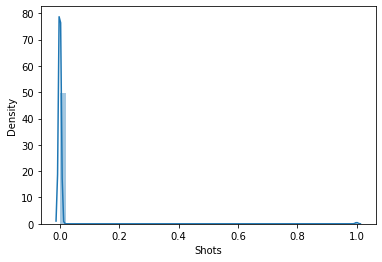

In [ ]:
sns.distplot(ltrain['Shots'])

In [29]:
print(len(merge_test['Game_ID'].unique()))
print(len(ltest['Game_ID'].unique()))

234
234


In [30]:
print(ltrain.shape)
print(ltest.shape)

(1567834, 25)
(780234, 21)


In [ ]:
ltest.Half.unique()

array(['1st half', '2nd half', None], dtype=object)

In [ ]:
#ltest.dropna(inplace=True)

In [31]:
missing_data =missing_value_cnt_percent(ltest)
mcols= missing_data[missing_data['Percent']>0].Colum_names.to_list()
print(mcols)

['Passes', 'Inaccurate passes', 'Accurate passes', 'SoT', 'Shots', 'Half', 'Start_minutes']


In [32]:
object_mcols=[]
for i in mcols:
  if ltest[i].dtypes =='O':
    object_mcols.append(i)
print(object_mcols)

['Half']


In [33]:
num_mcols=[]
for i in mcols:
  if ltest[i].dtypes !='O':
    num_mcols.append(i)
print(num_mcols)

['Passes', 'Inaccurate passes', 'Accurate passes', 'SoT', 'Shots', 'Start_minutes']


In [34]:
for i in object_mcols:
  print(i)
  ltest[i]=ltest[i].fillna(ltest[i].mode()[0])#filling my mode  

Half


In [35]:
for i in num_mcols:
  ltest[i]=ltest[i].fillna(ltest[i].mean())#filling my mean  

In [36]:
ltest.isnull().sum()[ltest.isnull().sum()>1]

Series([], dtype: int64)

In [37]:
print(ltrain.shape)
print(ltest.shape)

(1567834, 25)
(780234, 21)


So missing values in train and test data is treated.

In [ ]:
print(ltrain.columns)
print(ltest.columns)

Index(['Date', 'Season_x', 'Match_ID', 'Game_ID', 'Home Team', 'Away Team',
       'Score', 'Player_ID', 'id', 'X', 'Y', 'Team', 'Action', 'Half',
       'Season_y', 'Opposition_Team', 'Shots', 'SoT', 'Goals_scored',
       'Goals_conceded', 'Accurate passes', 'Inaccurate passes', 'Passes',
       'Start_minutes', 'End_minutes'],
      dtype='object')
Index(['Date', 'Season_x', 'Match_ID', 'Game_ID', 'Home Team', 'Away Team',
       'Player_ID', 'id', 'X', 'Y', 'Team', 'Half', 'Season_y',
       'Opposition_Team', 'Shots', 'SoT', 'Accurate passes',
       'Inaccurate passes', 'Passes', 'Start_minutes', 'End_minutes'],
      dtype='object')


# Object datatypes

In [ ]:
object_cols=[]
for i in ltrain.columns:
  if ltrain[i].dtype =='O':
    object_cols.append(i)
print(object_cols)

['Date', 'Game_ID', 'Home Team', 'Away Team', 'Score', 'Player_ID', 'Team', 'Action', 'Half', 'Opposition_Team']


In [ ]:
object_cols=[]
for i in ltest.columns:
  if ltest[i].dtype =='O':
    object_cols.append(i)
print(object_cols)

['Date', 'Game_ID', 'Home Team', 'Away Team', 'Player_ID', 'Team', 'Half', 'Opposition_Team']


Same object columns. Ignoring Score(train) and action(test).

# Non Object datatypes

In [ ]:
nobject_cols=[]
for i in ltrain.columns:
  if ltrain[i].dtype !='O':
    nobject_cols.append(i)
print(nobject_cols)

['Season_x', 'Match_ID', 'id', 'X', 'Y', 'Season_y', 'Shots', 'SoT', 'Goals_scored', 'Goals_conceded', 'Accurate passes', 'Inaccurate passes', 'Passes', 'Start_minutes', 'End_minutes']


In [ ]:
nobject_cols=[]
for i in ltest.columns:
  if ltest[i].dtype !='O':
    nobject_cols.append(i)
print(nobject_cols)

['Season_x', 'Match_ID', 'id', 'X', 'Y', 'Season_y', 'Shots', 'SoT', 'Accurate passes', 'Inaccurate passes', 'Passes', 'Start_minutes', 'End_minutes']


In [ ]:
print(ltrain.shape)
print(ltest.shape)

(1567834, 25)
(780234, 21)


# Drop ['Goals_scored', 'Goals_conceded'] columns from trian dataset

'Goals_scored', 'Goals_conceded' columns are not in test. They are only in train dataset. So lets drop them as well. BEfore dropping lets see their unique values.

In [38]:
for i in ['Goals_scored', 'Goals_conceded']:
    print(i, len(ltrain[i].unique()), ltrain[i].unique())

Goals_scored 2 [0. 1.]
Goals_conceded 2 [0. 1.]


In [39]:
ltrain.drop(['Goals_scored', 'Goals_conceded'], axis=1, inplace=True)

In [40]:
print(ltrain.shape)
print(ltest.shape)

(1567834, 23)
(780234, 21)


# Drop Action Column

In [41]:
print(len(ltrain['Action'].unique()))#action column not in test
ltrain['Action']

50


0           Free-kick attacks
1             Accurate passes
2           Free-kick attacks
3           Inaccurate passes
4           Free-kick attacks
                  ...        
1571572     Opp half pick-ups
1571573    Positional attacks
1571574     Inaccurate passes
1571575    Positional attacks
1571576         Interceptions
Name: Action, Length: 1567834, dtype: object

In [42]:
ltrain.drop(['Action'], axis=1, inplace=True)

In [43]:
print(ltrain.shape)
print(ltest.shape)#label Score will not be in test, we are good to go

(1567834, 22)
(780234, 21)


Dropped those columns in train which are not in test.

# Date Column

In [44]:
date_col =['Date']

# Handle Categorical Fetaures

In [45]:
categorical_cols=[feature for feature in ltrain.columns if ltrain[feature].dtypes=='O' and feature not in date_col+['Game_ID']+['Score']]
print(categorical_cols)

['Home Team', 'Away Team', 'Player_ID', 'Team', 'Half', 'Opposition_Team']


In [46]:
testcategorical_cols=[feature for feature in ltest.columns if ltest[feature].dtypes=='O' and feature not in date_col+['Game_ID']]
print(testcategorical_cols)

['Home Team', 'Away Team', 'Player_ID', 'Team', 'Half', 'Opposition_Team']


The categorical columns are identical in train and test. Lets see their unique categories list.

In [47]:
for feature in categorical_cols:
    print('The feature is {} and number of categories are {}'.format(feature,len(ltrain[feature].unique())))

The feature is Home Team and number of categories are 19
The feature is Away Team and number of categories are 19
The feature is Player_ID and number of categories are 650
The feature is Team and number of categories are 19
The feature is Half and number of categories are 2
The feature is Opposition_Team and number of categories are 19


In [48]:
for feature in testcategorical_cols:
    print('The feature is {} and number of categories are {}'.format(feature,len(ltest[feature].unique())))

The feature is Home Team and number of categories are 16
The feature is Away Team and number of categories are 16
The feature is Player_ID and number of categories are 528
The feature is Team and number of categories are 16
The feature is Half and number of categories are 2
The feature is Opposition_Team and number of categories are 16


There are 2 unique columns for Half.And 4 columns of 16/19 and other column >500. Lets look into the data and treat them.

# One HOt encoding

**Half column**

In [49]:
ltrain['Half']=pd.get_dummies(ltrain['Half'],drop_first=1)#if its 0 then 1st half , 1 is 2nd half
ltest['Half']=pd.get_dummies(ltest['Half'],drop_first=1)#if its 0 then 1st half , 1 is 2nd half

In [ ]:
print(ltrain['Half'].dtype)#convert this datatype as its unsigned integer
ltest['Half'].dtype#convert this datatype as its unsigned integer


uint8


dtype('uint8')

**Team related column names**


Team, Home, Away, Opposition team columns have got different categories in train and test dataset. So lets combine the train and test dataset and do the one hot encoding and then delete the duplicate columns.

In [ ]:
print(ltrain.shape)
print(ltest.shape)

(1567834, 22)
(780234, 21)


In [50]:
combined_train_test=pd.concat([ltrain,ltest],axis=0)#there will be NAN for Scores columns for test
combined_train_test.shape #1567834+780234 = 2348068

(2348068, 22)

In [51]:
combined_train_test['Score'].value_counts()# 629820+505769+432245 =1567834(train), rest are NAN

Home Win    629820
Draw        505769
Away win    432245
Name: Score, dtype: int64

In [52]:
final_df =combined_train_test.copy()

In [53]:
def onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [54]:
team_cols =['Home Team', 'Away Team',  'Team', 'Opposition_Team']
final_df=onehot_multcols(team_cols)

Home Team
Away Team
Team
Opposition_Team


In [55]:
final_df.shape#102 cols (22)

(2348068, 102)

# Delete duplicate columns

In [56]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [57]:
final_df.shape#102 cols reduced to 39

(2348068, 39)

In [ ]:
final_df.dtypes

Date                  object
Season_x               int64
Match_ID             float64
Game_ID               object
Score                 object
Player_ID             object
id                   float64
X                    float64
Y                    float64
Half                   uint8
Season_y               int64
Shots                float64
SoT                  float64
Accurate passes      float64
Inaccurate passes    float64
Passes               float64
Start_minutes        float64
End_minutes          float64
Antennae               uint8
Backward               uint8
Butterfly              uint8
Cartwheel              uint8
Cigar                  uint8
Circinus               uint8
Coma Pinwheel          uint8
Comet                  uint8
Cosmos Redshift 7      uint8
Eye of Sauron          uint8
Fireworks              uint8
Malin 1                uint8
Medusa Merger          uint8
Milky Way              uint8
Needle                 uint8
Sculptor               uint8
Sombrero      

**Convert unsigned int8 to integer**

In [58]:
final_df.columns[final_df.dtypes=='uint8']

Index(['Half', 'Antennae', 'Backward', 'Butterfly', 'Cartwheel', 'Cigar',
       'Circinus', 'Coma Pinwheel', 'Comet', 'Cosmos Redshift 7',
       'Eye of Sauron', 'Fireworks', 'Malin 1', 'Medusa Merger', 'Milky Way',
       'Needle', 'Sculptor', 'Sombrero', 'Sunflower', 'Tadpole', 'Triangulum',
       'Whirlpool'],
      dtype='object')

In [59]:
uint_cols= ['Half', 'Antennae', 'Backward', 'Butterfly', 'Cartwheel', 'Cigar',
       'Circinus', 'Coma Pinwheel', 'Comet', 'Cosmos Redshift 7',
       'Eye of Sauron', 'Fireworks', 'Malin 1', 'Medusa Merger', 'Milky Way',
       'Needle', 'Sculptor', 'Sombrero', 'Sunflower', 'Tadpole', 'Triangulum',
       'Whirlpool']

In [60]:
for i in uint_cols:
  final_df[i]=final_df[i].astype(int)
print('converted all uint8 columns to integer')

converted all uint8 columns to integer


In [61]:
set(final_df.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

In [62]:
final_df.columns[final_df.dtypes=='uint8']

Index([], dtype='object')

In [63]:
final_df.shape#102 cols reduced to 39

(2348068, 39)

In [64]:
final_df.columns[final_df.dtypes=='O']

Index(['Date', 'Game_ID', 'Score', 'Player_ID'], dtype='object')

**drop Player_id and Date column**

In [65]:
final_df.drop(['Date','Player_ID'],axis=1,inplace=True)

In [66]:
final_df.columns[final_df.dtypes=='O']

Index(['Game_ID', 'Score'], dtype='object')

**Seperate the combined train and test sample dataset**

In [ ]:
final_df.head()

,Season_x,Match_ID,Game_ID,Score,id,X,Y,Half,Season_y,Shots,SoT,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,Antennae,Backward,Butterfly,Cartwheel,Cigar,Circinus,Coma Pinwheel,Comet,Cosmos Redshift 7,Eye of Sauron,Fireworks,Malin 1,Medusa Merger,Milky Way,Needle,Sculptor,Sombrero,Sunflower,Tadpole,Triangulum,Whirlpool
0,1,1.0,ID_KAG4KAE9,Away win,1.0,52.5,34.3,0,1,0.0,0.0,0.0,0.0,0.0,0.18,0.52,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1.0,ID_KAG4KAE9,Away win,2.0,52.5,34.3,0,1,0.0,0.0,1.0,0.0,1.0,0.18,0.52,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1.0,ID_KAG4KAE9,Away win,3.0,39.5,34.2,0,1,0.0,0.0,0.0,0.0,0.0,0.20,0.53,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1.0,ID_KAG4KAE9,Away win,4.0,43.3,34.2,0,1,0.0,0.0,0.0,1.0,1.0,0.23,0.57,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1.0,ID_KAG4KAE9,Away win,5.0,43.3,34.2,0,1,0.0,0.0,0.0,0.0,0.0,0.23,0.57,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
print(ltrain.shape)
print(ltest.shape)

(1567834, 22)
(780234, 21)


In [68]:
cleaned_train=final_df.iloc[:1567834,:]
cleaned_test=final_df.iloc[1567834:,:]

In [69]:
print(cleaned_train.shape)
print(cleaned_test.shape)

(1567834, 37)
(780234, 37)


In [70]:
cleaned_test['Score'].unique()#all NaN , lets drop that column in test

array([nan], dtype=object)

In [71]:
cleaned_test.drop(['Score'],axis=1,inplace=True)
print(cleaned_test.shape)

(780234, 36)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**Making Game_ID as index**

In [72]:
cleaned_train=cleaned_train.set_index(['Game_ID'])
cleaned_test=cleaned_test.set_index(['Game_ID'])

In [73]:
print(cleaned_train.shape)
print(cleaned_test.shape)

(1567834, 36)
(780234, 35)


In [ ]:
cleaned_train.head()

,Season_x,Match_ID,Score,id,X,Y,Half,Season_y,Shots,SoT,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,Antennae,Backward,Butterfly,Cartwheel,Cigar,Circinus,Coma Pinwheel,Comet,Cosmos Redshift 7,Eye of Sauron,Fireworks,Malin 1,Medusa Merger,Milky Way,Needle,Sculptor,Sombrero,Sunflower,Tadpole,Triangulum,Whirlpool
Game_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ID_KAG4KAE9,1,1.0,Away win,1.0,52.5,34.3,0,1,0.0,0.0,0.0,0.0,0.0,0.18,0.52,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ID_KAG4KAE9,1,1.0,Away win,2.0,52.5,34.3,0,1,0.0,0.0,1.0,0.0,1.0,0.18,0.52,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ID_KAG4KAE9,1,1.0,Away win,3.0,39.5,34.2,0,1,0.0,0.0,0.0,0.0,0.0,0.20,0.53,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ID_KAG4KAE9,1,1.0,Away win,4.0,43.3,34.2,0,1,0.0,0.0,0.0,1.0,1.0,0.23,0.57,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ID_KAG4KAE9,1,1.0,Away win,5.0,43.3,34.2,0,1,0.0,0.0,0.0,0.0,0.0,0.23,0.57,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cleaned_test.head()

,Season_x,Match_ID,id,X,Y,Half,Season_y,Shots,SoT,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,Antennae,Backward,Butterfly,Cartwheel,Cigar,Circinus,Coma Pinwheel,Comet,Cosmos Redshift 7,Eye of Sauron,Fireworks,Malin 1,Medusa Merger,Milky Way,Needle,Sculptor,Sombrero,Sunflower,Tadpole,Triangulum,Whirlpool
Game_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ID_8518U587,3,102.0,1.0,52.0,33.9,0,3,0.0,0.0,0.0,0.0,0.0,0.03,0.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ID_8518U587,3,102.0,2.0,52.0,33.9,0,3,0.0,0.0,1.0,0.0,1.0,0.03,0.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ID_8518U587,3,102.0,3.0,35.0,31.9,0,3,0.0,0.0,0.0,0.0,0.0,0.07,0.40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ID_8518U587,3,102.0,4.0,35.0,31.9,0,3,0.0,0.0,1.0,0.0,1.0,0.07,0.40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ID_8518U587,3,102.0,5.0,25.9,5.6,0,3,0.0,0.0,0.0,0.0,0.0,0.12,0.45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Mapping Label column (Score) 

In [74]:
print(set(cleaned_train.dtypes))
print(set(cleaned_test.dtypes))

{dtype('O'), dtype('int64'), dtype('float64')}
{dtype('int64'), dtype('float64')}


In [75]:
cleaned_train.columns[cleaned_train.dtypes=='O']

Index(['Score'], dtype='object')

In [ ]:
cleaned_train.Score.unique()

array(['Away win', 'Draw', 'Home Win'], dtype=object)

In [76]:
cleaned_train.Score.value_counts()

Home Win    629820
Draw        505769
Away win    432245
Name: Score, dtype: int64

In [ ]:
#cleaned_train['Score']=cleaned_train['Score'].map({'Away win':0,'Draw':1, 'Home Win': 2})

In [77]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cleaned_train['Score'] = le.fit_transform(cleaned_train['Score'])
score_mapping = dict(zip(le.classes_, range(len(le.classes_))))

In [78]:
cleaned_train.Score.value_counts()

2    629820
1    505769
0    432245
Name: Score, dtype: int64

In [79]:
set(cleaned_train.dtypes)

{dtype('int64'), dtype('float64')}

Mapping is right.

# Split Train, valid, Test Dataset

In [109]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, make_scorer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

In [81]:
print(cleaned_train.shape)
print(cleaned_test.shape)

(1567834, 36)
(780234, 35)


In [82]:
print(len(train['Game_ID'].unique()))
print(len(test['Game_ID'].unique()))
print(len(cleaned_train.index.unique()))
print(len(cleaned_test.index.unique()))

412
234
412
234


In [83]:
class config:
    random_state = 44

In [84]:
x = cleaned_train.drop(['Score'], axis = 1)
y = cleaned_train['Score']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.1,
                                random_state = config.random_state, stratify = y)#1

In [ ]:
xgb=XGBClassifier()#without hyper parameter tuning ran at first 
xgb.fit(X_train,y_train)#2

# Hyper Parameter Tuning with XGBClassifier

In [104]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [106]:
xgbclassifier=XGBClassifier()

In [113]:
LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)
#rs = RandomizedSearchCV(xgbclassifier, params, cv=5, scoring=LogLoss)

In [114]:
random_search=RandomizedSearchCV(xgbclassifier,param_distributions=params,n_iter=5,scoring=LogLoss,n_jobs=-1,cv=5,verbose=3)

In [ ]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train.ravel())
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [ ]:
random_search.best_estimator_#gives best parameters for the given /passed parameters

In [89]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(xgb, open(filename, 'wb'))#3

In [90]:
# make predictions for test data
y_pred = xgb.predict(X_test)
predictions = [round(value) for value in y_pred]#4

In [91]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))#5

Accuracy: 69.87%


In [92]:
#Predictiing logloss on Test Set
y_prob_pred = xgb.predict_proba(X_test)
print(log_loss(y_test,y_prob_pred))#6

0.7761425499074676


In [93]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('random forest Confusion Matrix', color= 'Blue')#7

# Sample Test Data prediction

In [94]:
# make predictions for test data
sample_y_pred = xgb.predict(cleaned_test)
predictions = [round(value) for value in sample_y_pred]#8

In [95]:
#Predictiing logloss on Test Set
sample_predictions = xgb.predict_proba(cleaned_test)
len(sample_predictions)#9

780234

In [96]:
model_Test = cleaned_test.copy()
model_Test['Game_ID']= model_Test.index
print(model_Test.shape)#10
#model_Test.head(2)

(780234, 36)


In [97]:
cols=le.inverse_transform([*range(3)])
model_Test[cols]= sample_predictions
submit = model_Test[["Game_ID",'Away win', 'Draw', 'Home Win']]#11

In [98]:
submit

,Game_ID,Away win,Draw,Home Win
Game_ID,,,,
ID_8518U587,ID_8518U587,0.228775,0.166161,0.605064
ID_8518U587,ID_8518U587,0.228775,0.166161,0.605064
ID_8518U587,ID_8518U587,0.228775,0.166161,0.605064
ID_8518U587,ID_8518U587,0.228775,0.166161,0.605064
ID_8518U587,ID_8518U587,0.228775,0.166161,0.605064
...,...,...,...,...
ID_2ZK5TE39,ID_2ZK5TE39,0.056537,0.923159,0.020304
ID_IS54QGW9,ID_IS54QGW9,0.056091,0.915868,0.028041
ID_IS54QGW9,ID_IS54QGW9,0.056091,0.915868,0.028041


In [101]:
submit.drop_duplicates(subset = ["Game_ID"], inplace=True)
submit = submit.reset_index(drop=True)#12

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [102]:
submit#13

,Game_ID,Away win,Draw,Home Win
0,ID_8518U587,0.228775,0.166161,0.605064
1,ID_H49BIKG7,0.064941,0.402168,0.532890
2,ID_PO6SP4VA,0.066088,0.312433,0.621479
3,ID_MZRCNBAQ,0.284357,0.354509,0.361134
4,ID_CV9VOLIU,0.154455,0.462048,0.383497
...,...,...,...,...
229,ID_QKQ00O16,0.056091,0.915868,0.028041
230,ID_172V2IXW,0.004678,0.970580,0.024742
231,ID_2ZK5TE39,0.056537,0.923159,0.020304
232,ID_IS54QGW9,0.056091,0.915868,0.028041


In [103]:
submit.to_csv("submission_xgb.csv", index=False)#14

In [ ]:
#first submission 1.253008105932298